# Fake Job Listing Detection Using AI and ML

Sometimes, fake recruiters post un-real job listings on job portals and websites with un-lawful purposes. Here, I will attempt to implement a machine learning program to detect these fake listings.

I will build a NLP (Natural Language Processing) pipeline With the following steps:

1. Sentence Segmentation: Breaking the phrase into separate Sentences


2. Word Tokenization: Breaking the sentence to separate words


3. Stemming: Transforming the words to their roots


4. Lemmatization: It produces the root word which has a meaning


5. Identifying Stop Words: The words such as 'is', 'and', 'the',... should be filtered out before any statistical analysis


6. Dependency Parsing: Finding how the words in a sentence are related to eachother


7. POS tags: POS stands for Parts Of Speech. It indicates the gramatical role of a word (noun, verb, adjective, ...)


8. Named Entity Recognition: The process of recognizing a named entity like a movie, car, person, brand, ...


9. Chunking: is the process of picking the individual information and group them into meaningful mixtures.

We will also makes use of Support Vector Machine (SVM) method for our classification. If the data points are linearly separable, we can use a linear kernel or hyperplane. Otherwise, we will go ahead with polynomial or radial basis functions.

We can also utilize Random Forest algorithm. In this algorithm, we randomly create a forest and several trees. A higher number of trees will result in more accurate results.

Random Forest algorithm can help us when we want to decide based on a number of parameters, e.g. when buying a house. It randomly selects a number of parameters and builds a decision tree based on that group.
Clearly, the more trees we have, the more accurate result we will reach. The class that has the majority of votes by the trees will be selected as our predicted class.

So, after this pretty log introduction, let's go ahead with the fun part, code! 

Let us first install and import the necessary libraries!

In [2]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\HP\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-install-04dcqkpj\\wordcloud_d9656a3b5c5d4c4e9cbd027e1969cd99\\setup.py'"'"'; __file__='"'"'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-install-04dcqkpj\\wordcloud_d9656a3b5c5d4c4e9cbd027e1969cd99\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\HP\AppData\Local\Temp\pip-wheel-heum2pfo'
       cwd: C:\Users\HP\AppData\Local\Temp\pip-install-04dcqkpj\wordcloud_d9656a3b5c5d4c4e9cbd027e1969cd99\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating bui

In [3]:
pip install -U spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\HP\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-install-ab2x6qg6\\wordcloud_ddd87404f0a2403fabde150fe45e3cb5\\setup.py'"'"'; __file__='"'"'C:\\Users\\HP\\AppData\\Local\\Temp\\pip-install-ab2x6qg6\\wordcloud_ddd87404f0a2403fabde150fe45e3cb5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\HP\AppData\Local\Temp\pip-wheel-dz3g7n7e'
       cwd: C:\Users\HP\AppData\Local\Temp\pip-install-ab2x6qg6\wordcloud_ddd87404f0a2403fabde150fe45e3cb5\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creating bui

In [5]:
#conda install -c conda-forge wordcloud=1.8.0 

^C

Note: you may need to restart the kernel to use updated packages.


In [6]:
import re
import string
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
#from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [44]:
df=pd.read_csv(r'C:\Users\HP\Downloads\fake_job_postings.csv')

In [45]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [46]:
df.shape

(17880, 18)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [48]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Some columns havetoo many null values! Also, some columns do not provide meaningful information. Let's drop them and go ahead with other more complete columns.

In [49]:
columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range','employment_type']
for column in columns:
    del df[column]

In [50]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [51]:
df.isnull().sum()

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Let's now replace the other nul values with blanks.

In [52]:
df.fillna('',inplace=True)

Now I will compare the number of fraudulent and non-fraudulent job postings.

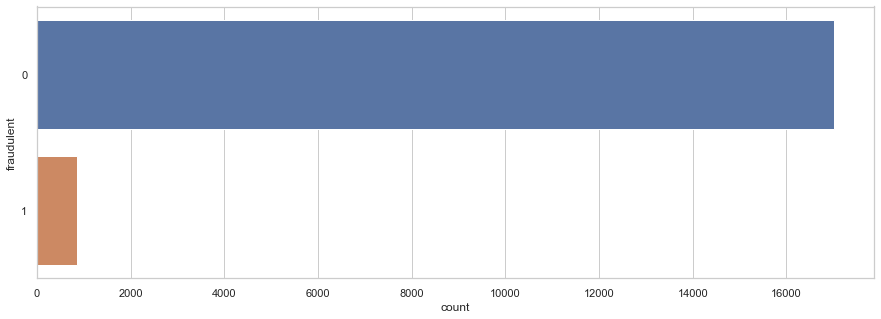

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data=df)
plt.show()

In [54]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

Good news is that the majority of jobs posted are non-fraudulent. But the bad news is that there are still a minority of fraudulent jobs (around 5%), which we will try to detect here in this project.

Let's also check the experience column and see how much experience do the jobs need in general.

In [55]:
exp=dict(df.required_experience.value_counts())
del exp['']

In [56]:
exp

{'Mid-Senior level': 3809,
 'Entry level': 2697,
 'Associate': 2297,
 'Not Applicable': 1116,
 'Director': 389,
 'Internship': 381,
 'Executive': 141}

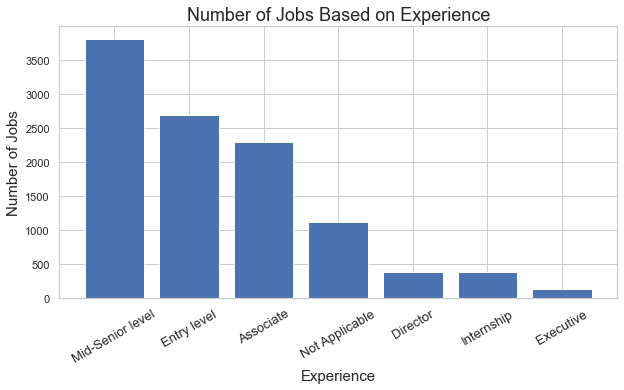

In [57]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(exp.keys(),exp.values())
plt.title('Number of Jobs Based on Experience',size=18)
plt.xlabel('Experience', size=15)
plt.ylabel('Number of Jobs',size=15)
plt.xticks(rotation=30,size=13)
plt.show()

We can see the distribution of required experience among all posted jobs.


Now, let us check to see if there exists any meaningful difference between the experience level in general and the required experience for fraudulent jobs.

In [58]:
exp2=dict(df.required_experience[df['fraudulent']==1].value_counts())
del exp2['']

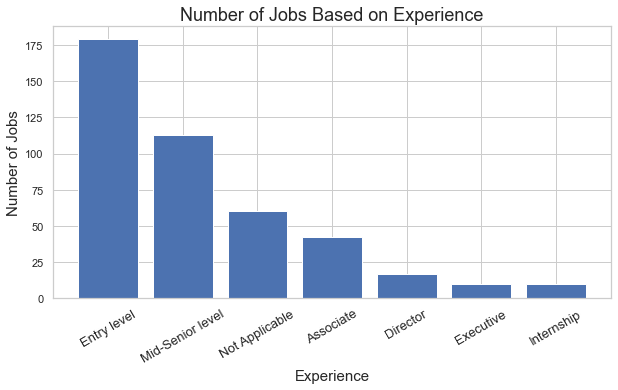

In [59]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(exp2.keys(),exp2.values())
plt.title('Number of Jobs Based on Experience',size=18)
plt.xlabel('Experience', size=15)
plt.ylabel('Number of Jobs',size=15)
plt.xticks(rotation=30,size=13)
plt.show()

Wow! There appears a crystal clear difference between the experience level required by these jobs. The fraudsters seem to target the entry level applicants and this seems logical (although not ethical). The entry level applicants would try their best in applying for each and every job so as to land for any job they can in the beginning. Furthermore, due to their lower average age, they would be an easier target.

Now, let's also visualize the data based on locations. Here, I will split the data based on countries.

In [60]:
#We just need the first elemet o the splitted location text.
def split(location):
    l=location.split(',')
    return l[0]
df['country']=df.location.apply(split)

In [61]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent,country
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,Internship,,,Marketing,0,US
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Not Applicable,,Marketing and Advertising,Customer Service,0,NZ
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,,,,,0,US
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


Now we can see the country column inserted to the right side of the table. Let's go ahead with the visualization.

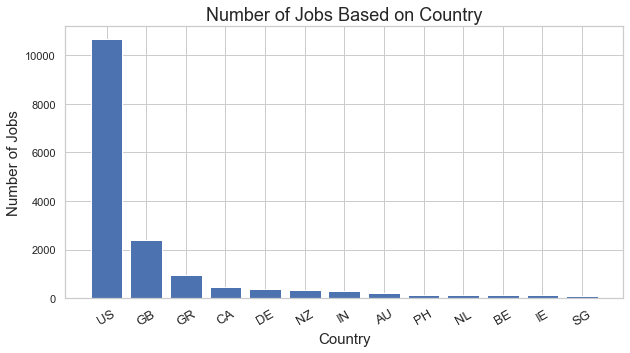

In [62]:
country=dict(df.country.value_counts()[:14])
del country['']

plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(country.keys(),country.values())
plt.title('Number of Jobs Based on Country',size=18)
plt.xlabel('Country', size=15)
plt.ylabel('Number of Jobs',size=15)
plt.xticks(rotation=30,size=13)
plt.show()

Now let's see which countries have had the highest number of fake listings.

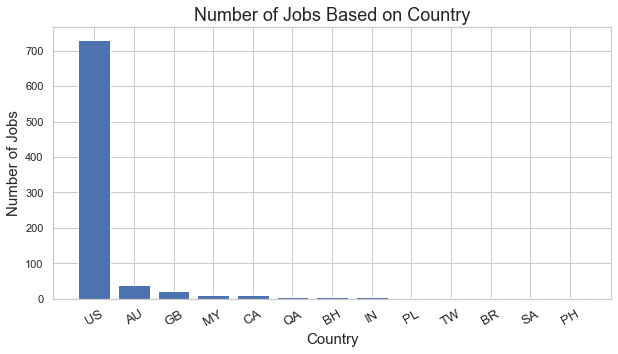

In [63]:
country=dict(df.country[df['fraudulent']==1].value_counts()[:14])
del country['']

plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(country.keys(),country.values())
plt.title('Number of Jobs Based on Country',size=18)
plt.xlabel('Country', size=15)
plt.ylabel('Number of Jobs',size=15)
plt.xticks(rotation=30,size=13)
plt.show()

Australia seems to have a relatively high number of fake listing, when compared to the total number of job listings. Also, Malaysia is the 4th rank in fake listings despite it is not among the first 14 in the total job postings.

We can also do a similar analysis based on the required education level.

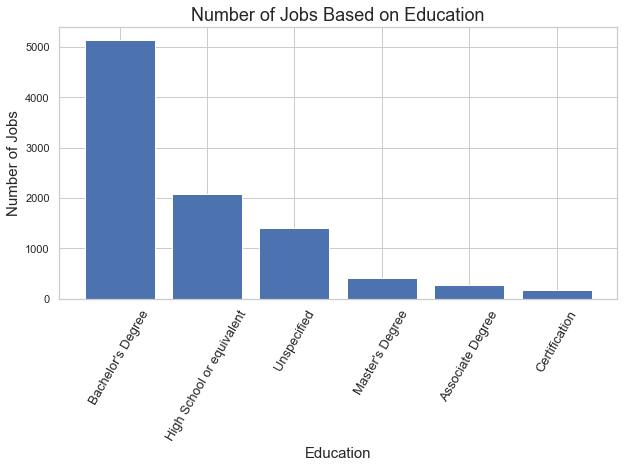

In [64]:
edu=dict(df.required_education.value_counts()[:7])
del edu['']

plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(edu.keys(),edu.values())
plt.title('Number of Jobs Based on Education',size=18)
plt.xlabel('Education', size=15)
plt.ylabel('Number of Jobs',size=15)
plt.xticks(rotation=60,size=13)
plt.show()

And now let's check this for the fraudulent postings.

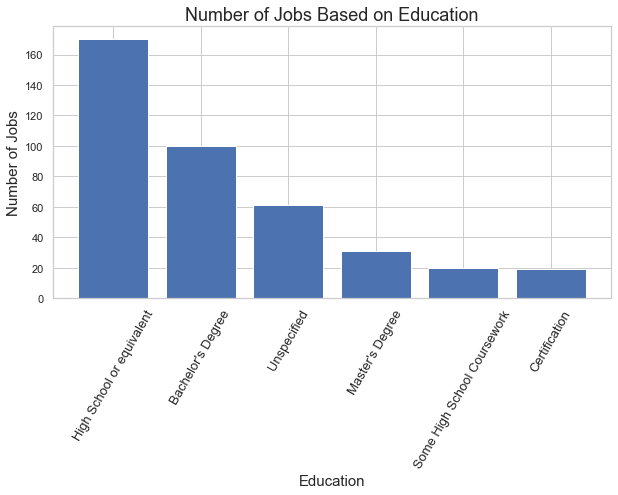

In [65]:
edu=dict(df.required_education[df['fraudulent']==1].value_counts()[:7])
del edu['']

plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
plt.bar(edu.keys(),edu.values())
plt.title('Number of Jobs Based on Education',size=18)
plt.xlabel('Education', size=15)
plt.ylabel('Number of Jobs',size=15)
plt.xticks(rotation=60,size=13)
plt.show()

Here also seems that the fake listings tend to target the people with high school degrees more than the others.

Now, let's check the top 10 job titles for the real jobs for the real job postings and compare that with the fake ones.

In [66]:
print(df[df['fraudulent']==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [67]:
print(df[df['fraudulent']==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


We can see difference between the job titles of the two groups. It can be clearly seen that many of the fake listings require data entry clerks or typists. Also, a relatively high number of them are home-based.

Now, in order to do NLP analysis, let's combine all the the text columns and remove other columns except the 'fraudulent' column into one column as text.


In [68]:
df['fulltext']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+del df['required_experience']+' '+del df['required_education']
del df['title']
del df['location']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']
del df['department']

In [69]:
df.head()

,fraudulent,fulltext
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


Now that we are left with only two necessary columns, let's go ahead with the NLP analysis.

Now let's put the job listings in two categories.

In [72]:
fake_listings=df[df.fraudulent==1]
real_listings=df[df.fraudulent==0]

To work with english words and natural language processing (NLP), we need to add some more packages.

In [73]:
pip install spacy && python -m spacy download en

[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Note: you may need to restart the kernel to use updated packages.


2022-02-09 15:02:35.666619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-02-09 15:02:35.666675: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [74]:
punctuation= string.punctuation
nlp=spacy.load('en_core_web_sm')
stop_words=spacy.lang.en.stop_words.STOP_WORDS


Now, let's load english tokenizers, taggers, parsers, etc.

In [75]:
parser=English()

def spacy_tokenizer(sentence):
    #creating a token object
    mytokens=parser(sentence)
    
    #lemmatizing each token and converting each token into lowercase
    mytokens=[word.lemma_.lower().strip() if word.lemma_ != '-PRON-' else word.lower_ for word in mytokens ]
    
    #Now let's get rid of all the stop words
    mytokens=[word for word in mytokens if word not in stop_words and word not in punctuations]
    
    return mytokens

# now let's custom transform using spacy. Here we are cleaning the text
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        
        return(clean_text(text) for text in X)
    
    def fit(self, X, y=None, **fit_params):
        return self
    
    def get_params(self, deep=True):
        return{}
    
def clean_text(text):
    return text.strip().lower()


In [77]:
df['fulltext']=df['fulltext'].apply(clean_text)

Next, I am going to use tfidf vectorizer to assign each word to a column and make the weight factors similar. In this approach, if the word is present in the text, that element of the column will become 1. Otherwise, it will become 0. This will basically show us how important is this word to the document.

In [84]:
#First we make a vectorizer object
cv=TfidfVectorizer(max_features=100)
#Then we use it to fit transform
x=cv.fit_transform(df['fulltext'])

df1=pd.DataFrame(x.toarray(), columns=cv.get_feature_names())

df.drop(['fulltext'], axis=1, inplace=True)

main_df= pd.concat([df1,df], axis=1)


In [85]:
main_df.head()

,ability,about,all,also,amp,an,and,are,as,at,...,who,will,with,work,working,world,years,you,your,fraudulent
0,0.000000,0.041120,0.000000,0.042424,0.036488,0.000000,0.755238,0.000000,0.078653,0.000000,...,0.000000,0.000000,0.186067,0.051026,0.068029,0.000000,0.000000,0.000000,0.000000,0
1,0.021895,0.094183,0.035394,0.024292,0.041787,0.029771,0.490896,0.056626,0.060050,0.052431,...,0.000000,0.078004,0.165735,0.043827,0.116862,0.099327,0.000000,0.204854,0.130452,0
2,0.000000,0.000000,0.176807,0.000000,0.041749,0.089231,0.397029,0.113149,0.000000,0.000000,...,0.000000,0.062346,0.307512,0.058383,0.000000,0.000000,0.000000,0.094462,0.074476,0
3,0.023267,0.000000,0.018806,0.000000,0.000000,0.094909,0.695542,0.000000,0.031906,0.037144,...,0.023132,0.049735,0.075480,0.046573,0.000000,0.105551,0.019806,0.050236,0.059411,0
4,0.000000,0.000000,0.068009,0.000000,0.040147,0.028602,0.606379,0.081605,0.115386,0.000000,...,0.000000,0.000000,0.159230,0.028071,0.037425,0.000000,0.035814,0.030279,0.107427,0


In [87]:
#Now let's split the dataset

y=main_df.iloc[:,-1]
X=main_df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

Now we reached the fun part! Machine Learning application!  Let's apply the Random Forest Algorithm.